In [70]:
%pylab inline
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
import plotly.express as px
import ipywidgets as widgets
from datetime import datetime
import pytz
import matplotlib.dates as mdates


Populating the interactive namespace from numpy and matplotlib


In [71]:
df19 = pd.read_csv("data/juyo-2019.csv")
df20 = pd.read_csv("data/juyo-2020.csv")
df19["daytime"] = pd.to_datetime(df19["DATE"]+" "+df19["TIME"], format="%Y/%m/%d %H:%M")
df20["daytime"] = pd.to_datetime(df20["DATE"]+" "+df20["TIME"], format="%Y/%m/%d %H:%M")
df20["実績(万kW)"]

df20 = df20.set_index('daytime')
df19 = df19.set_index('daytime')

df = pd.concat([df19, df20], sort=True)

# "実績(万kW)" = demand in 10MW
df = df.rename(columns={"実績(万kW)": "demand", "TIME": 'time', "DATE": "date"}, errors="raise")
# bring demand to MW (not 10MW)
df["demand"]=df["demand"]*10


In [72]:
df

,date,time,demand
daytime,,,
2019-01-01 00:00:00,2019/1/1,0:00,30170
2019-01-01 01:00:00,2019/1/1,1:00,28490
2019-01-01 02:00:00,2019/1/1,2:00,27300
2019-01-01 03:00:00,2019/1/1,3:00,26360
2019-01-01 04:00:00,2019/1/1,4:00,25790
...,...,...,...
2020-03-27 19:00:00,2020/3/27,19:00,32590
2020-03-27 20:00:00,2020/3/27,20:00,31190
2020-03-27 21:00:00,2020/3/27,21:00,29910


In [73]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['year']= df.index.year
#sns.lineplot(x=df, y="demand", ci=95, data=df)

In [74]:
sns.set(rc={'figure.figsize':(11, 4)})
df.head()
daily = df.resample('D').sum()
df.loc['2019-03-01':'2019-03-30', 'demand']
df19=df.loc['2019-03-01':'2019-03-30', 'demand']
df20=df.loc['2020-03-01':'2020-03-30', 'demand']
df20

daytime
2020-03-01 00:00:00    26850
2020-03-01 01:00:00    25680
2020-03-01 02:00:00    25410
2020-03-01 03:00:00    25290
2020-03-01 04:00:00    25310
                       ...  
2020-03-27 19:00:00    32590
2020-03-27 20:00:00    31190
2020-03-27 21:00:00    29910
2020-03-27 22:00:00    28600
2020-03-27 23:00:00    27040
Name: demand, Length: 648, dtype: int64

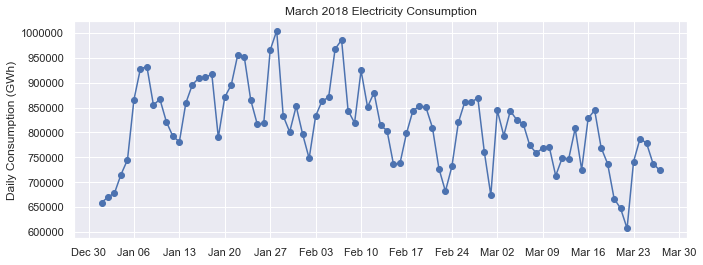

In [75]:
fig, ax = plt.subplots()
ax.plot(daily.loc['2020-01-01':'2020-03-31', 'demand'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('March 2018 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

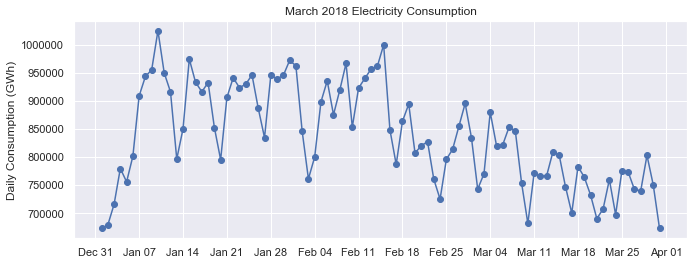

In [76]:
# ax = df.loc['2019', 'demand'].plot()
# ax.set_ylabel('Daily Consumption (MWh)');

fig, ax = plt.subplots()
ax.plot(daily.loc['2019-01-01':'2019-03-31', 'demand'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('March 2018 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


In [61]:
df19=df.loc['2019-03-01':'2019-03-30', 'demand']
df20=df.loc['2020-03-01':'2020-03-30', 'demand']
df20
by_weekday = df19.groupby(df19['weekday']).mean()['demand']
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);
by_weekday = df19.groupby(df20.index.dayofweek).mean()['demand']
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

KeyError: 'weekday'

In [47]:
df19=daily.loc['2019-03-01':'2019-03-30', 'demand']
df20=daily.loc['2020-03-01':'2020-03-30', 'demand']

daytime
2019-03-01    834510
2019-03-02    742700
2019-03-03    770130
2019-03-04    879530
2019-03-05    820250
2019-03-06    821930
2019-03-07    853150
2019-03-08    846360
2019-03-09    753620
2019-03-10    681620
2019-03-11    771650
2019-03-12    765380
2019-03-13    766760
2019-03-14    809200
2019-03-15    803220
2019-03-16    747140
2019-03-17    700290
2019-03-18    782950
2019-03-19    764140
2019-03-20    732330
2019-03-21    690250
2019-03-22    707370
2019-03-23    759720
2019-03-24    697390
2019-03-25    775530
2019-03-26    773170
2019-03-27    742210
2019-03-28    739670
2019-03-29    802920
2019-03-30    750220
2019-03-31    672830
Freq: D, Name: demand, dtype: int64